Current: checkpoint8_30_01_90_6326_7329_2025-09-13.pth, env8_30_01_2025-09-13.obj


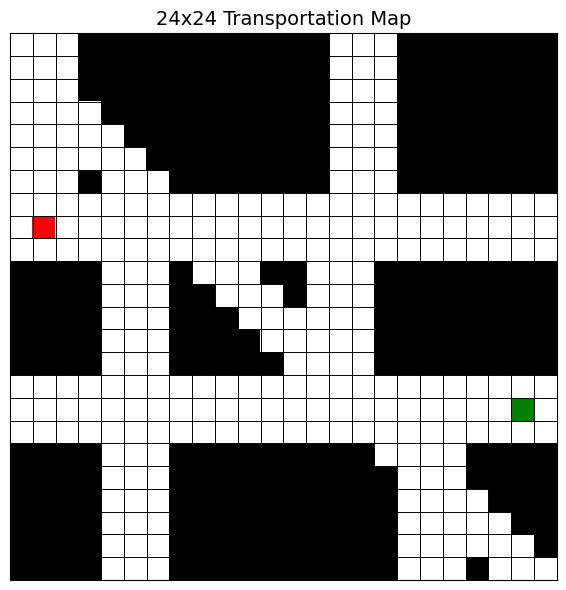

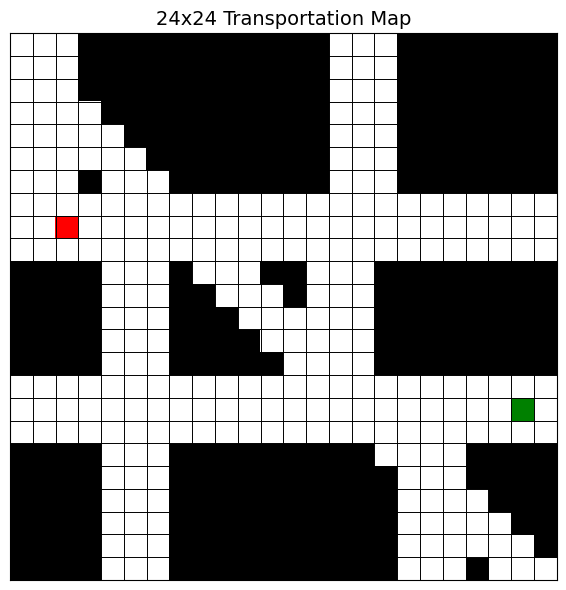

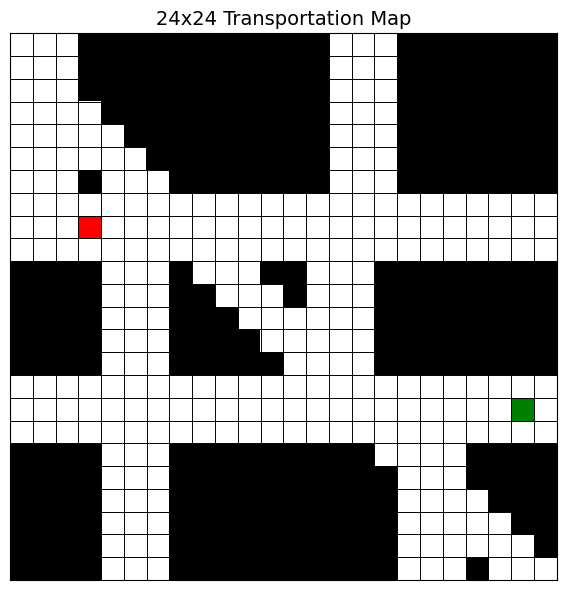

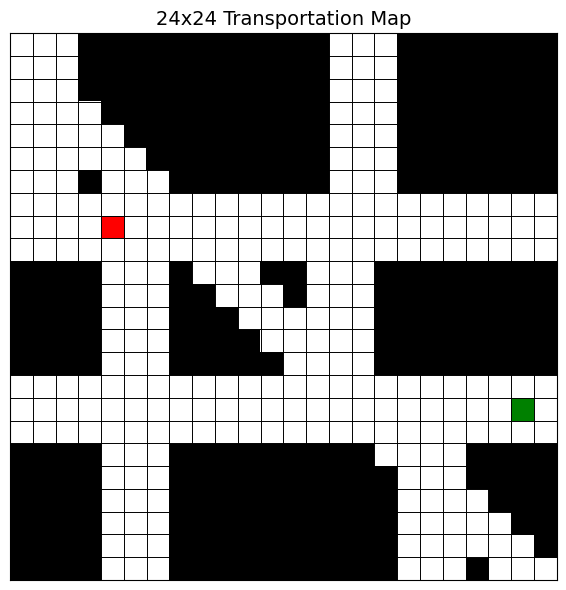

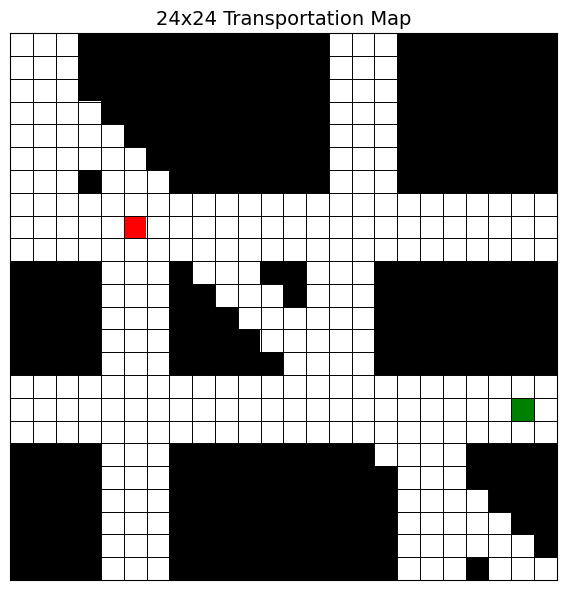

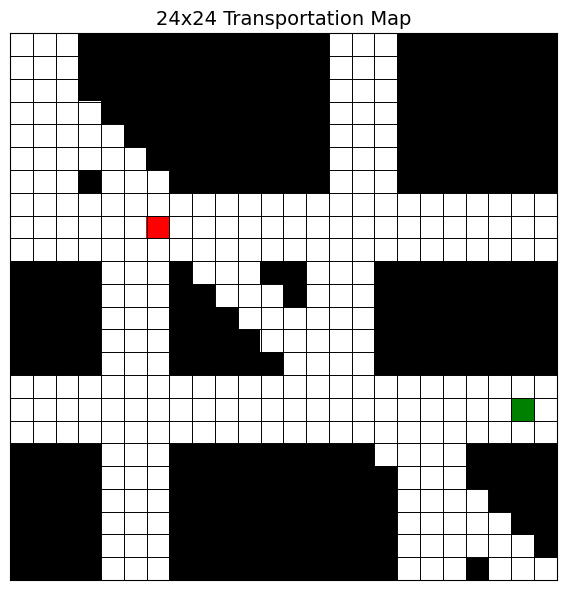

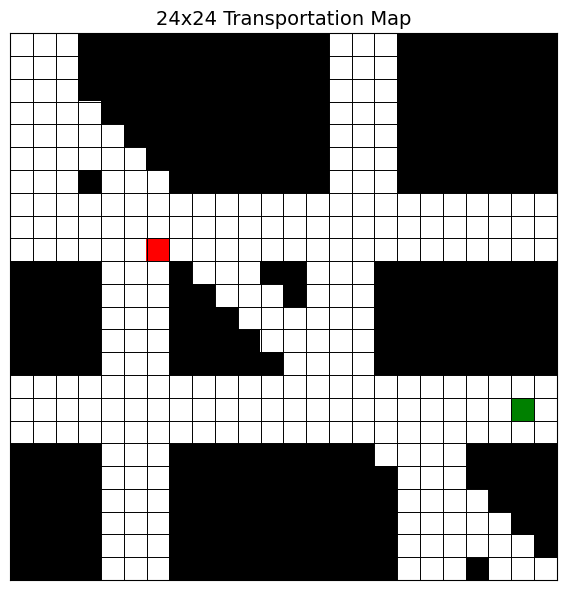

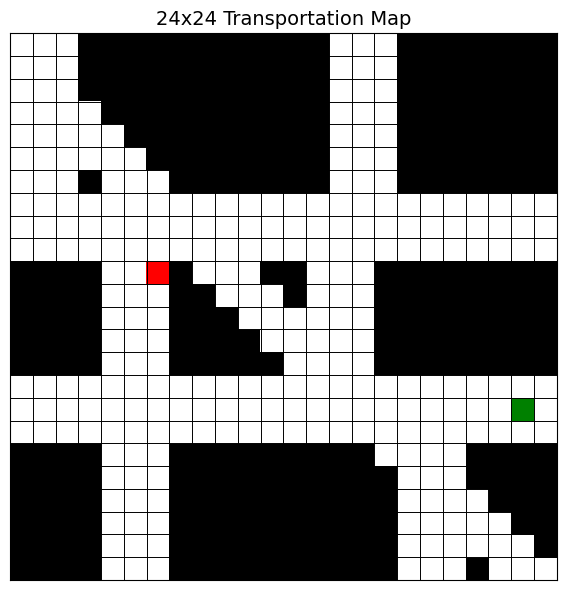

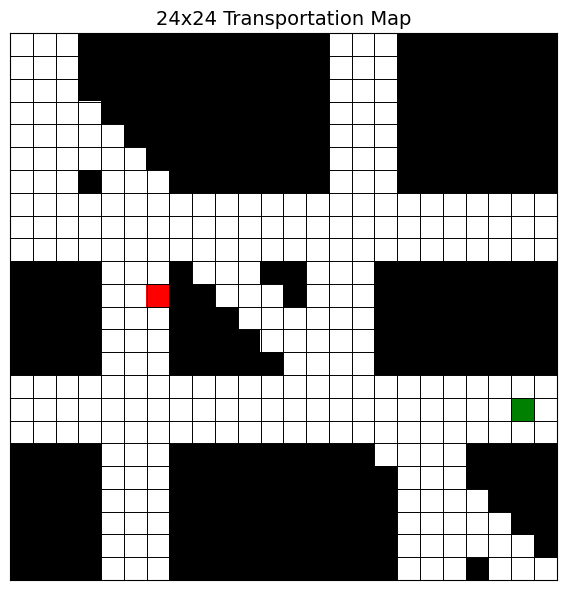

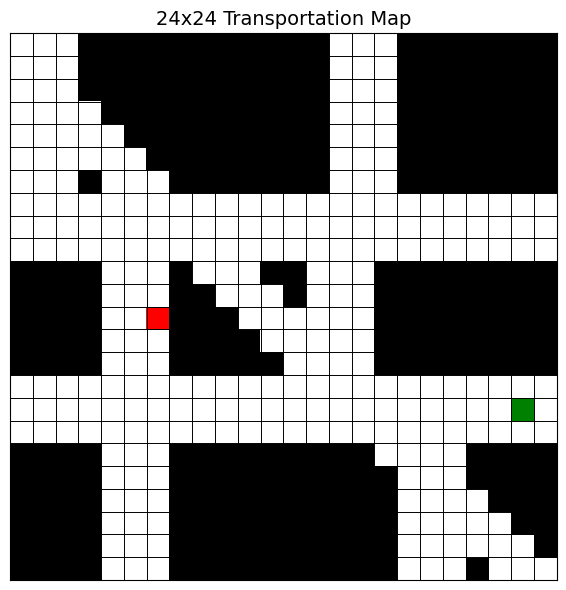

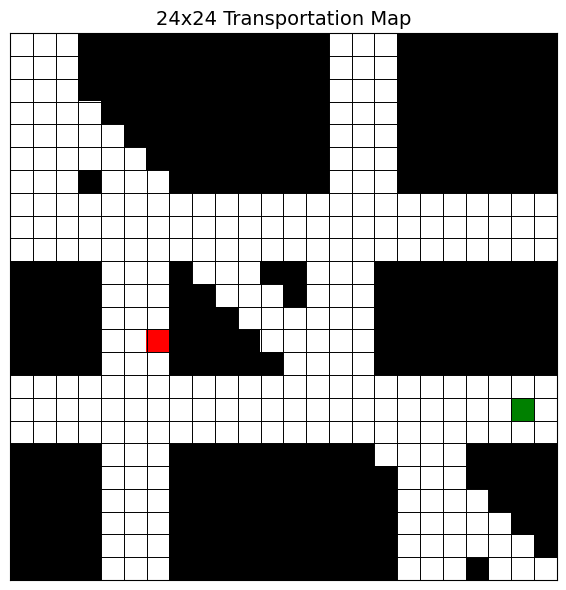

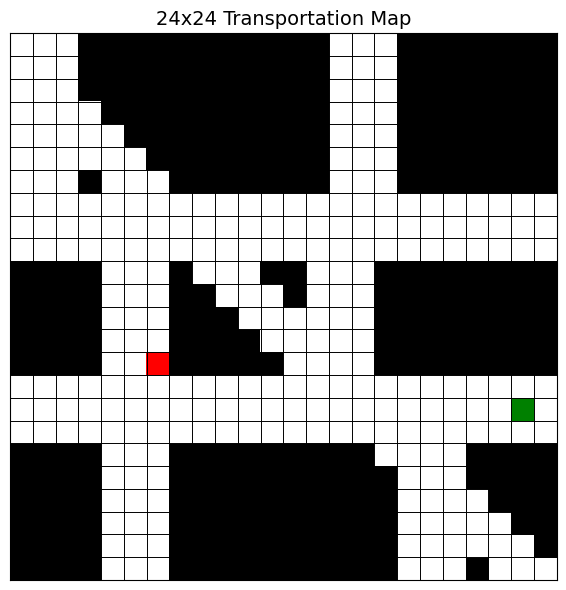

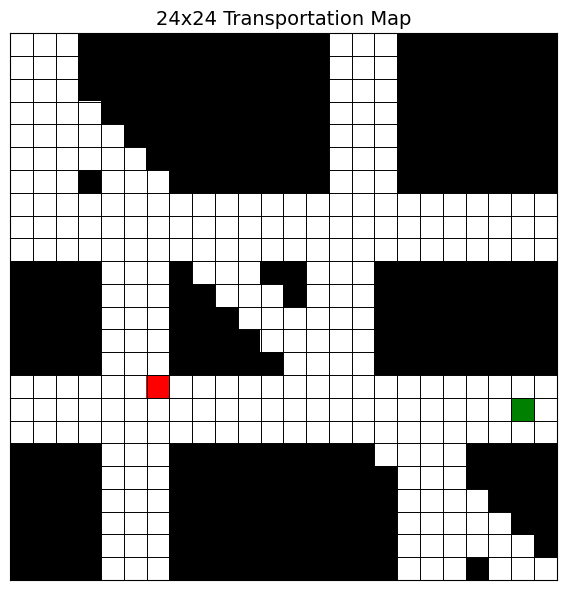

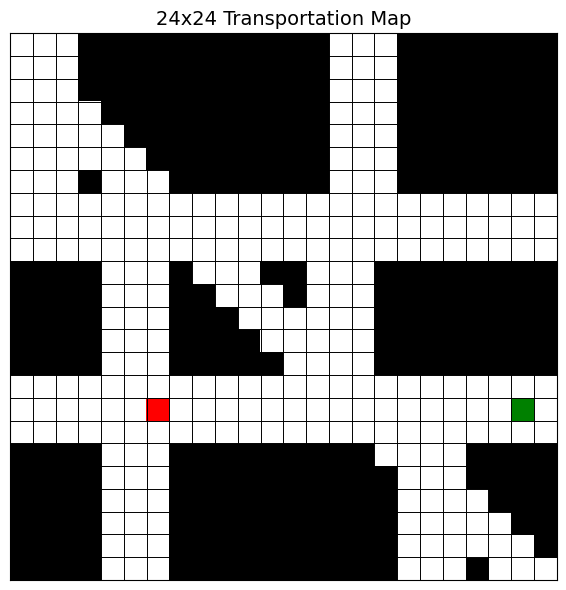

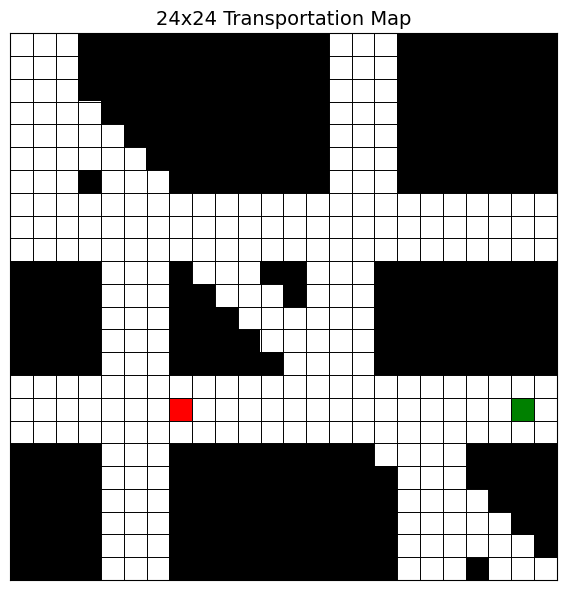

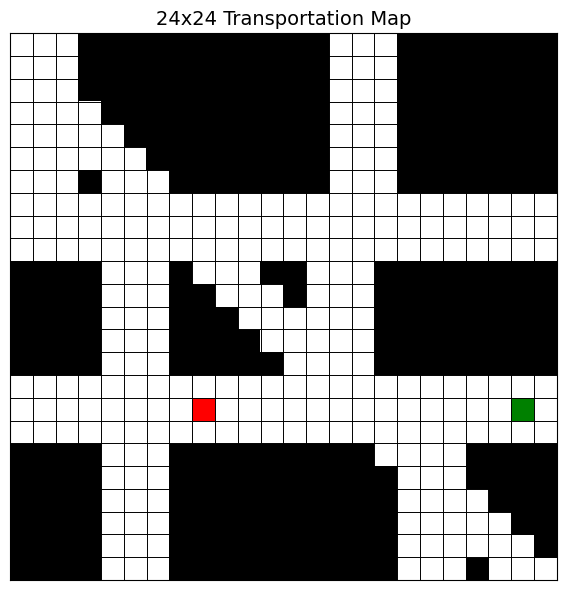

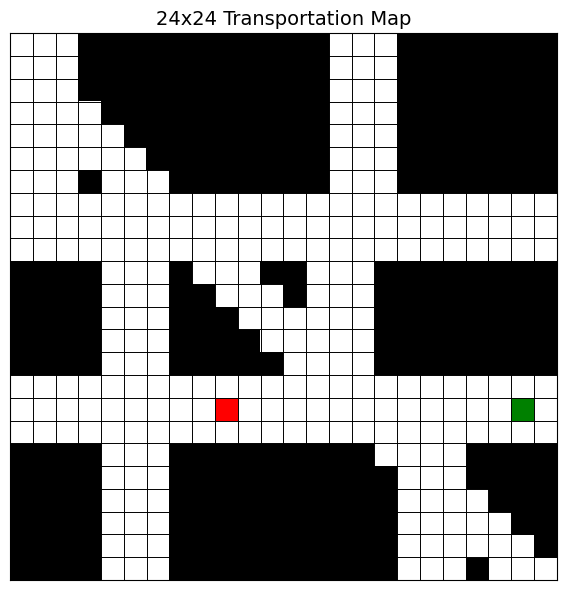

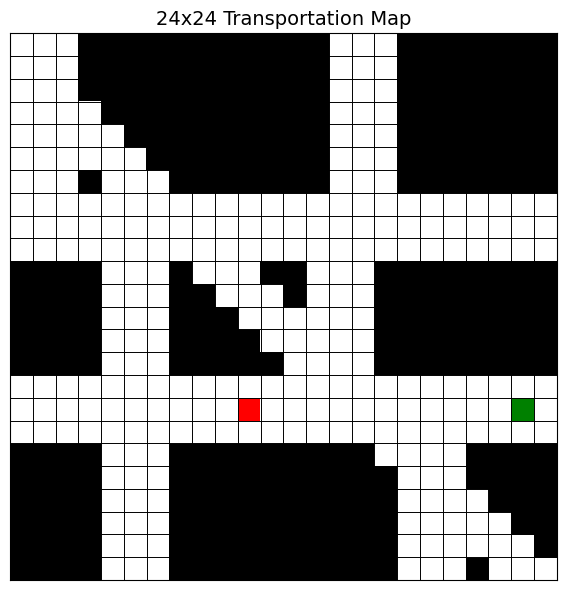

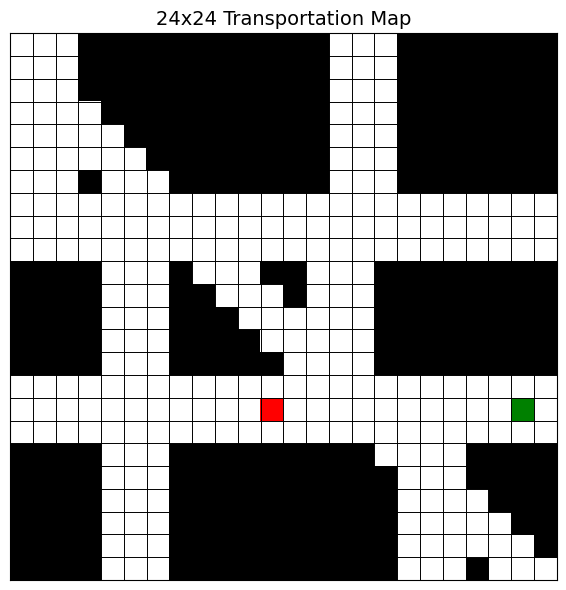

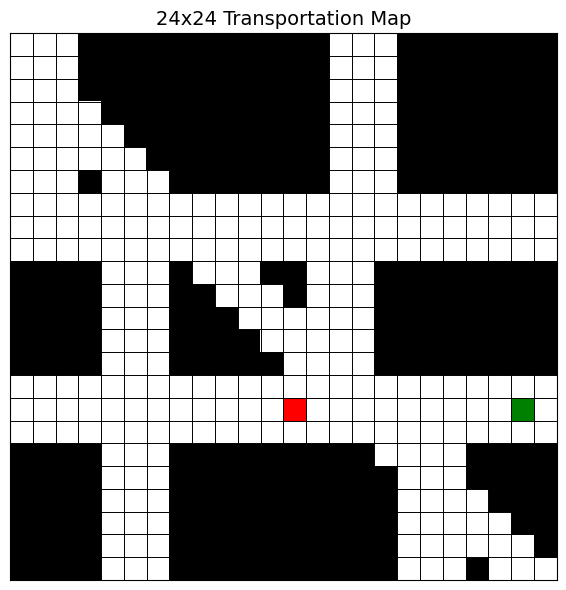

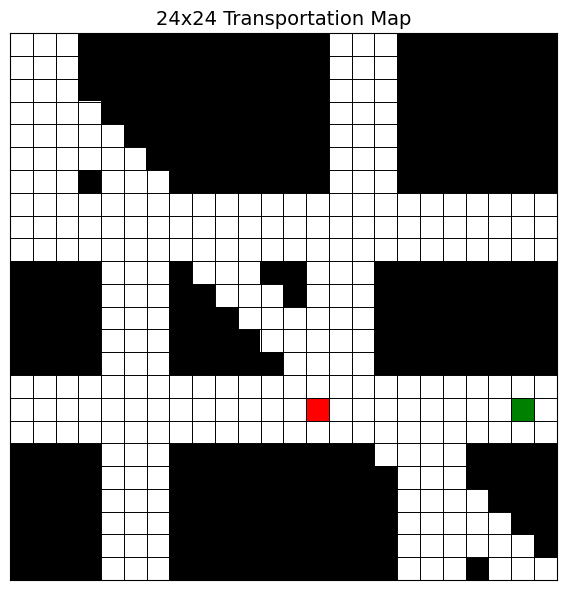

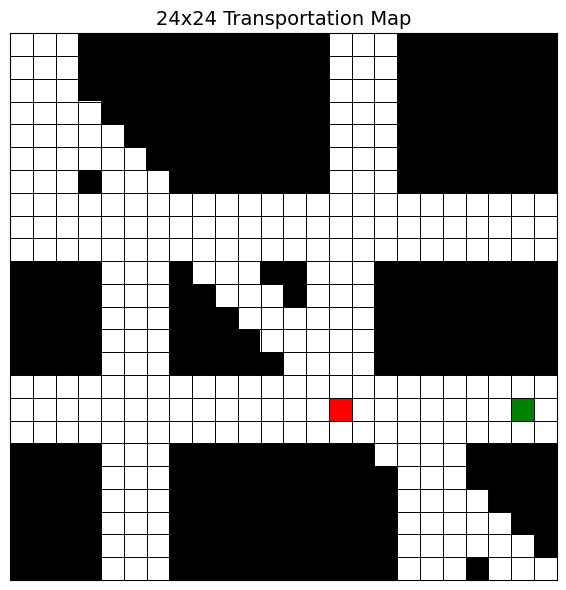

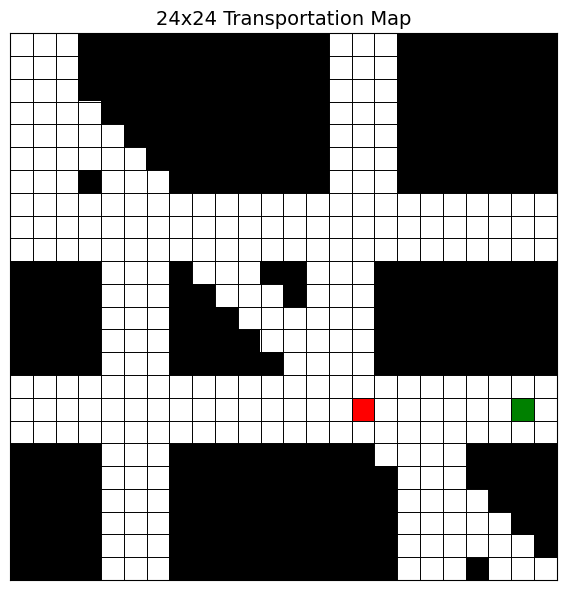

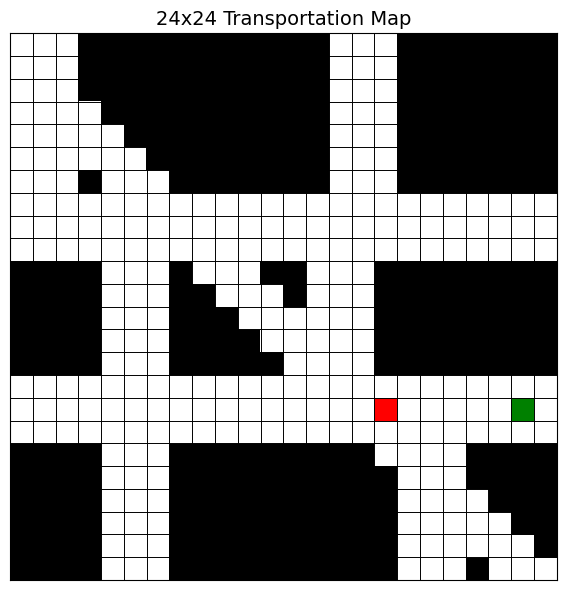

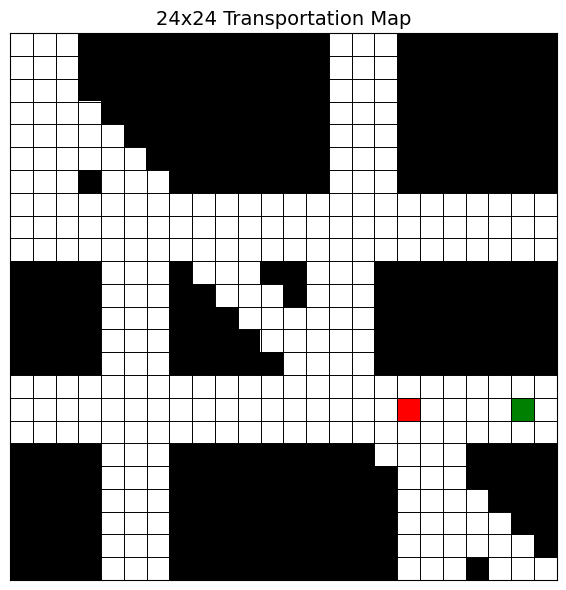

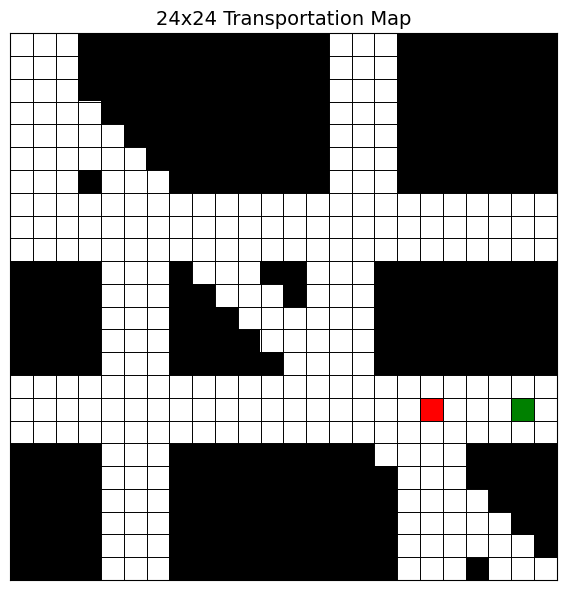

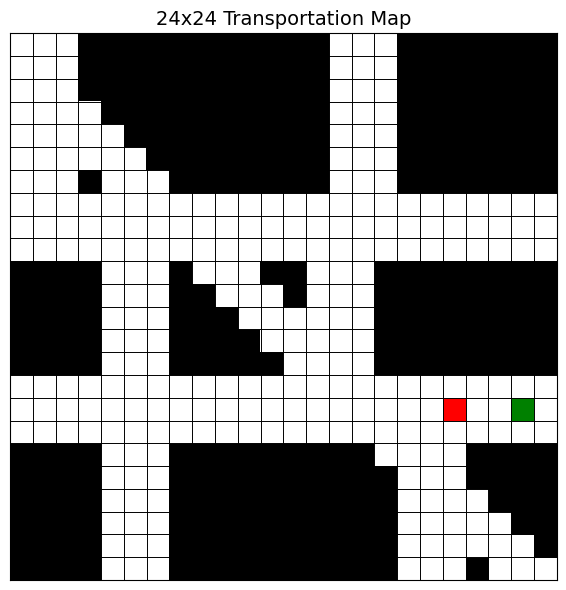

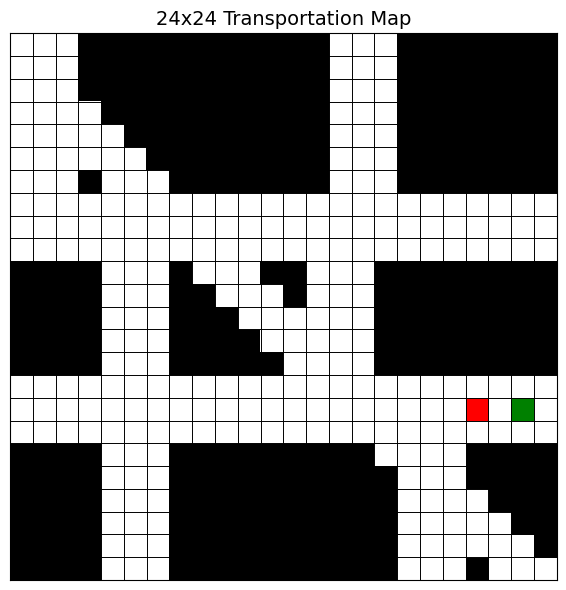

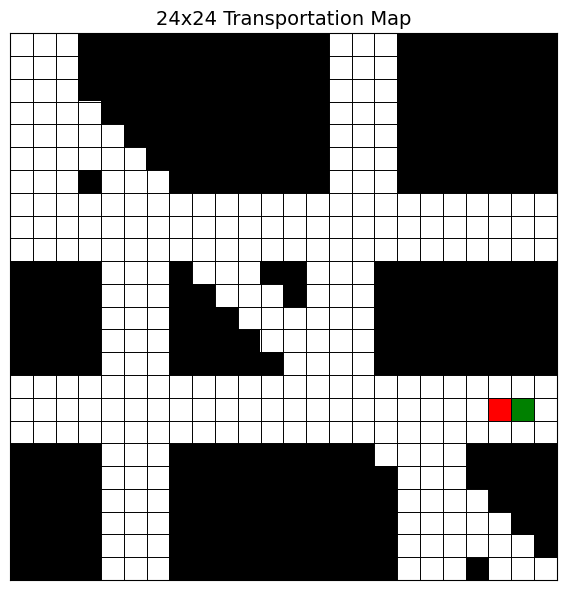

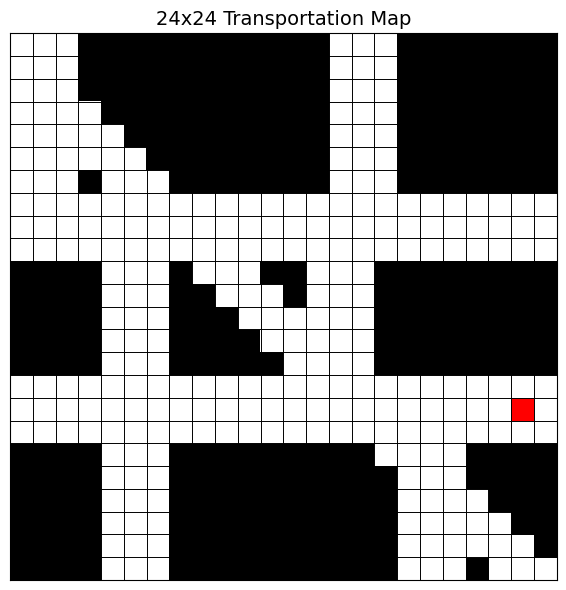

<<< Win >>>
===== Inference Done =====
ep_replay info: (30, 3, 24, 24) <class 'numpy.ndarray'>


Proceed?(Enter "go" to proceed, "done" to stop.):  done


Inference terminated...


In [3]:
from lib.env_manager_final import PathFindEnv
from lib.dqn_utils_final import DQN
from IPython.display import clear_output
import os

env = PathFindEnv(height=24, width=24)
dqn = DQN(train=False, input_size=24)

checkpoints = os.listdir(os.path.join(os.getcwd(), "checkpoints"))
env_info_files = os.listdir(os.path.join(os.getcwd(), "envs"))

ep_replay = None # 에피소드 진행 과정에서의 모든 스텝 기록
stop = False
for pathes in zip(checkpoints, env_info_files):
    clear_output(wait=True)

    print(f"Current: {pathes[0]}, {pathes[1]}")

    # env_info: (tp_map, src_pos, dest_pos)
    env_info = env.restore(pathes[1]) # 환경 복원
    ep_replay = dqn.inference(env=env, init_state=env_info[0], checkpoint=pathes[0], verbose=True)
    print("ep_replay info:", ep_replay.shape, type(ep_replay))

    while True:
        keyward = input("Proceed?(Enter \"go\" to proceed, \"done\" to stop.): ")
        match keyward:
            case "go":
                break
            case "done":
                stop = True
                print("Inference terminated...")
                break
            case _:
                print("Wrong keyward input. Please rewrite right keyward...")
                continue

    # 추론을 정지하는 경우
    if stop:
        break

Current: checkpoint8_30_07_90_6311_7151_2025-09-15.pth, env8_30_07_2025-09-15.obj


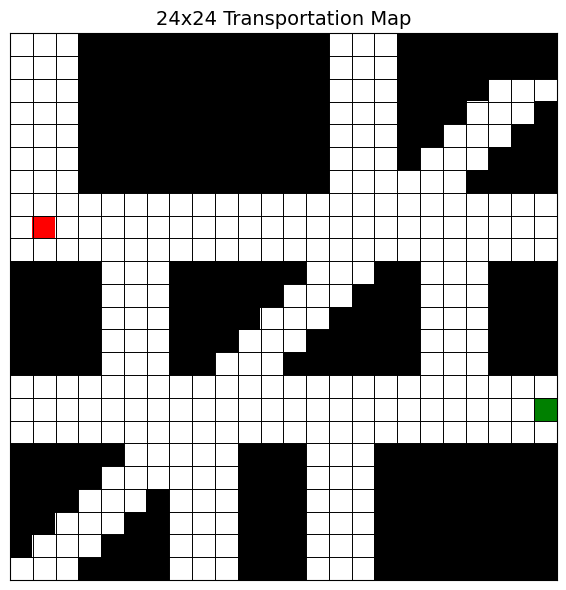

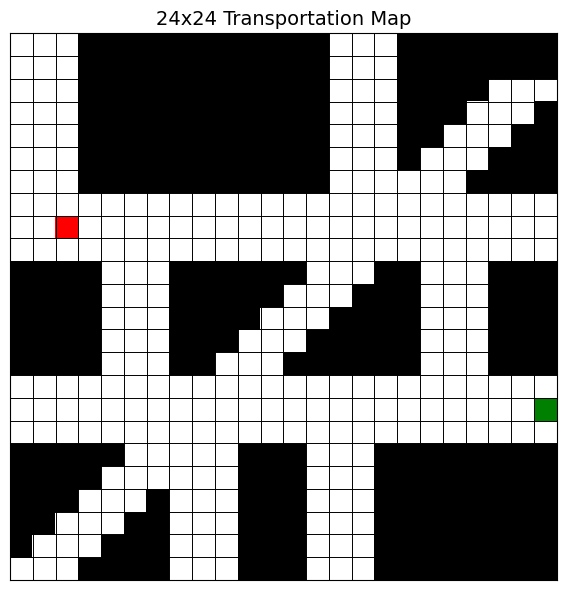

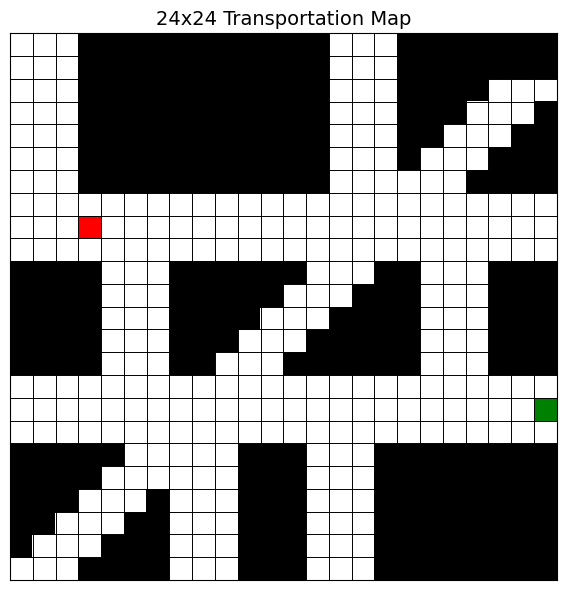

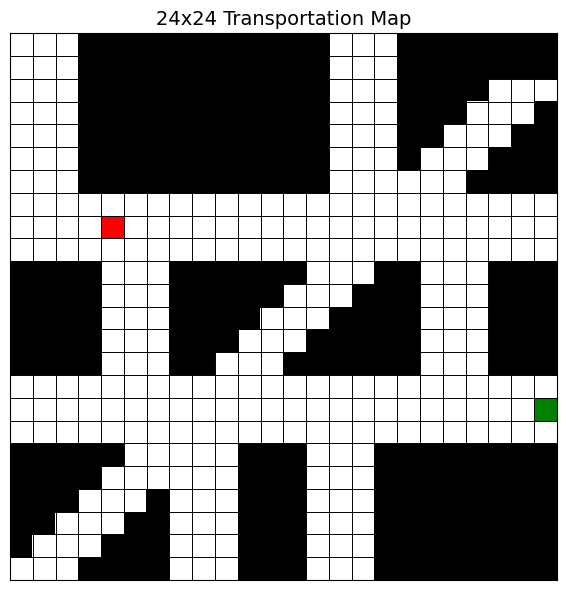

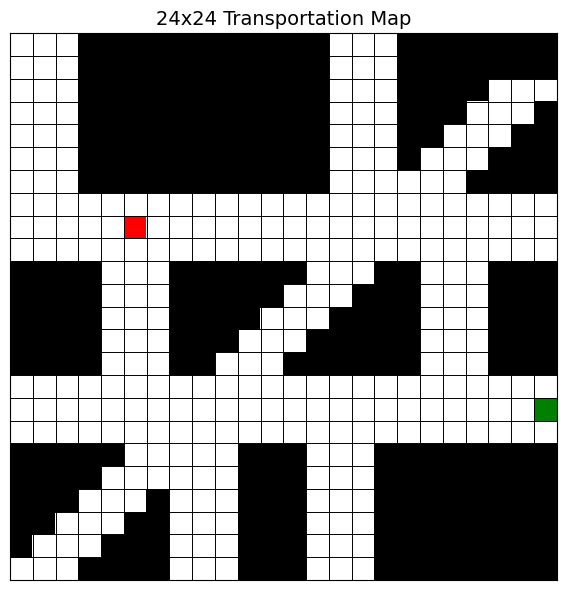

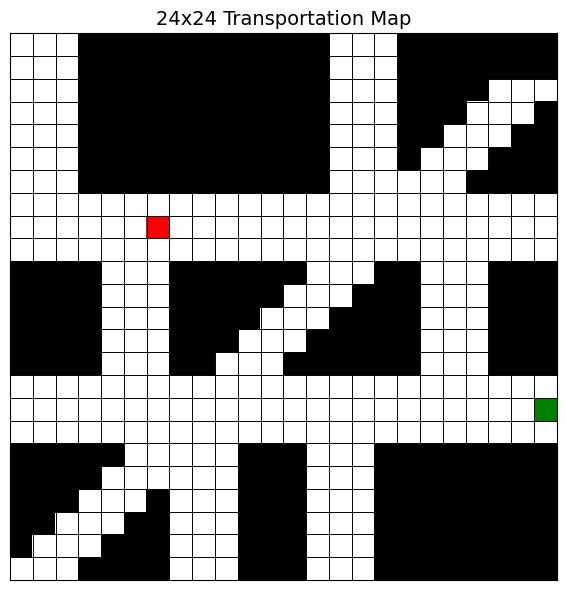

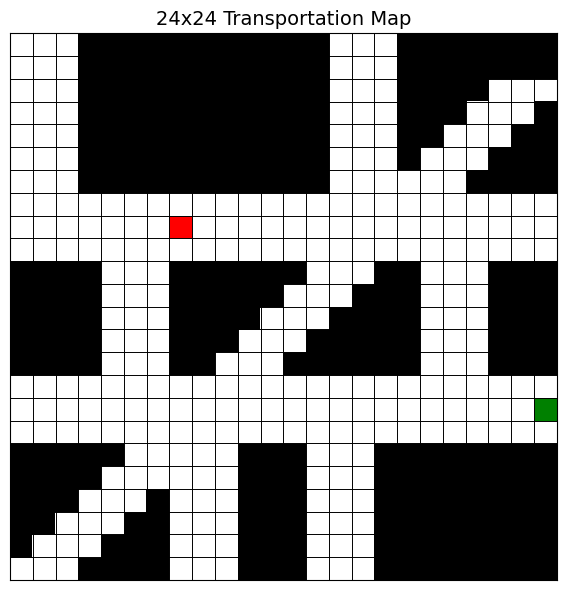

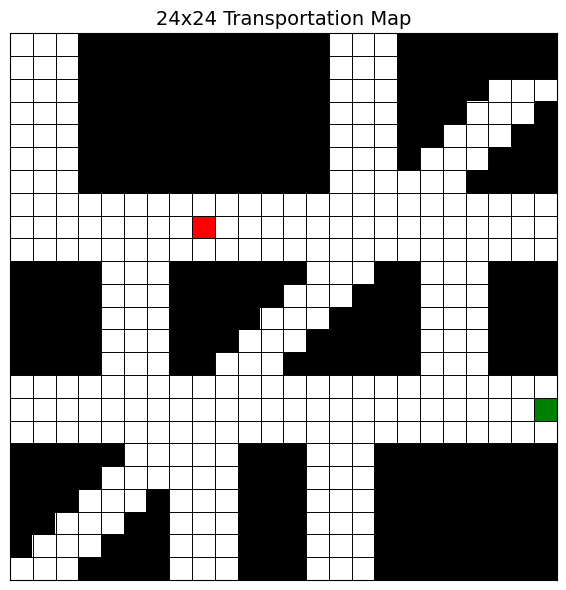

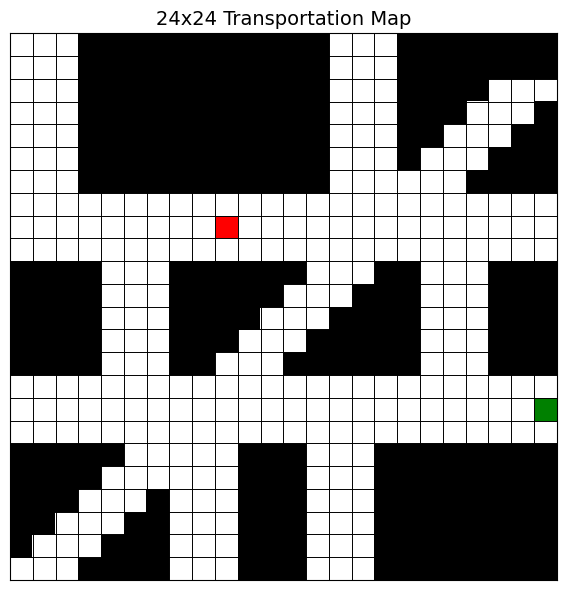

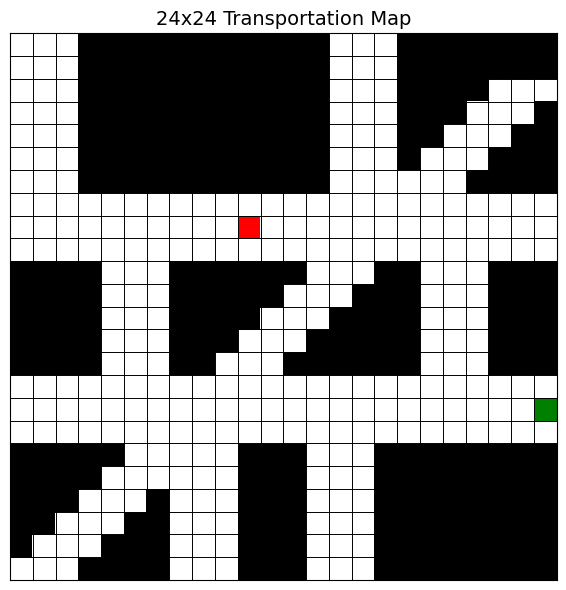

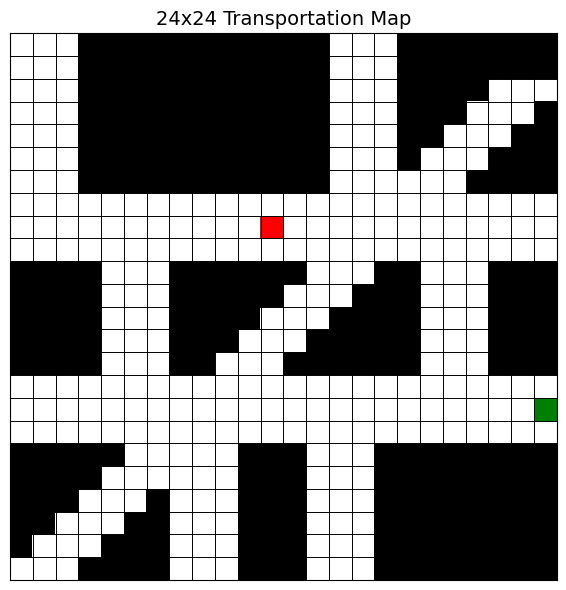

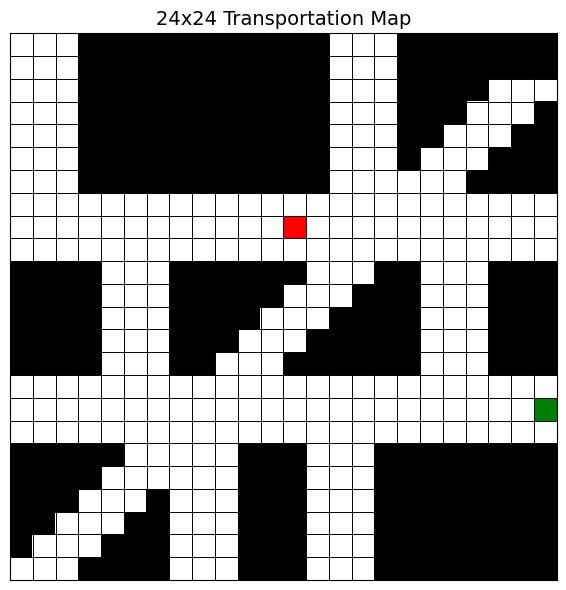

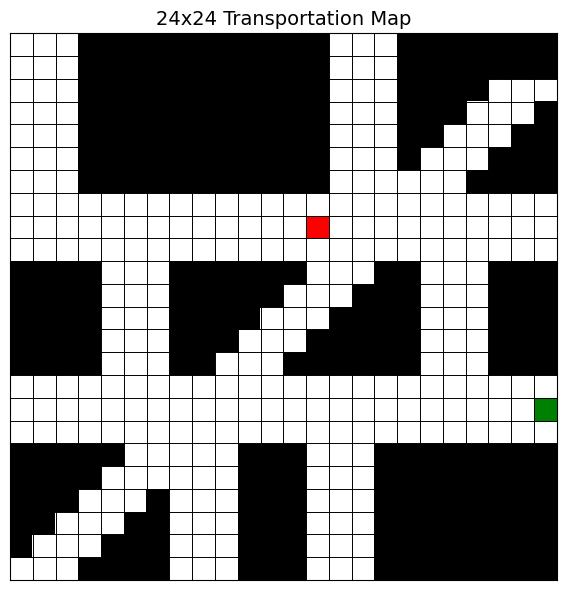

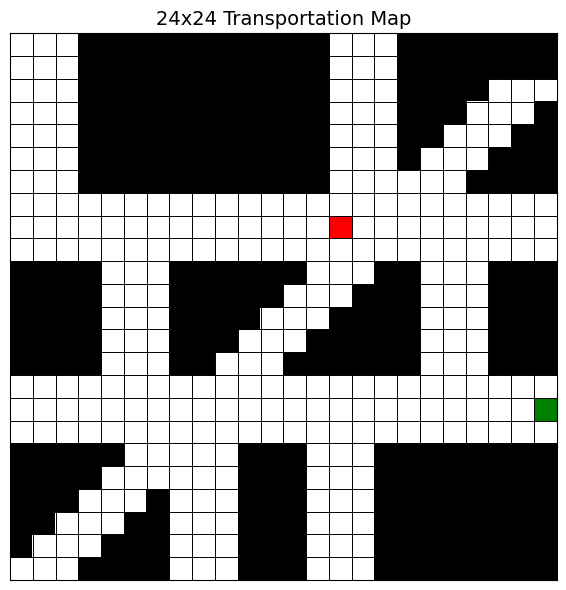

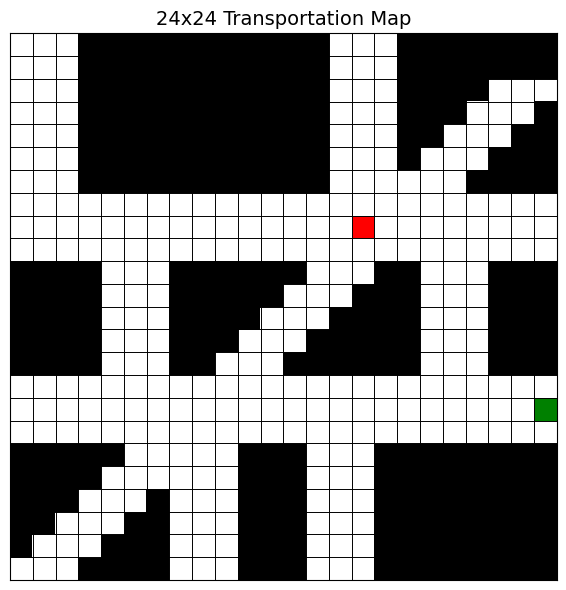

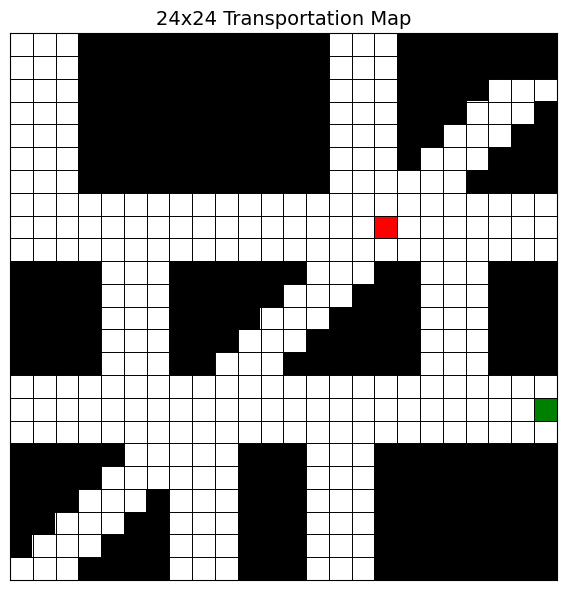

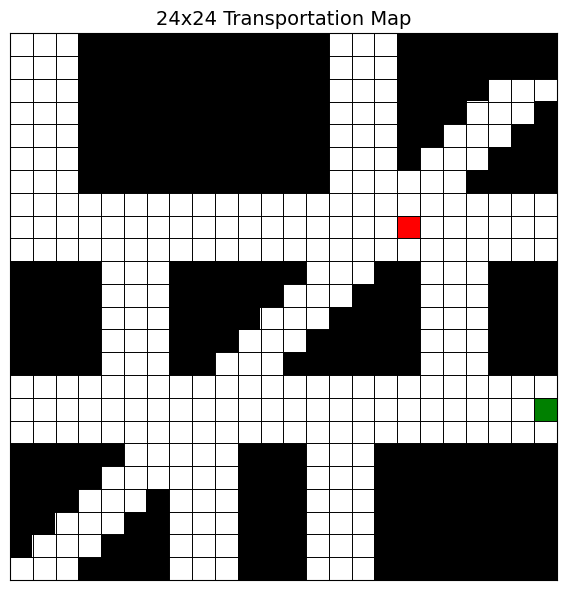

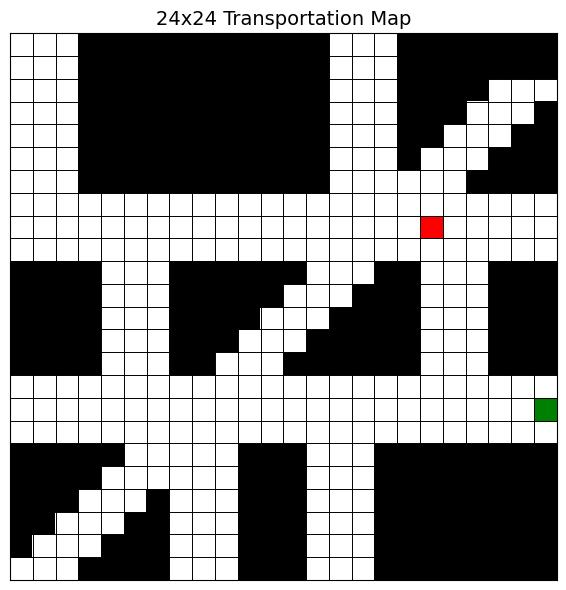

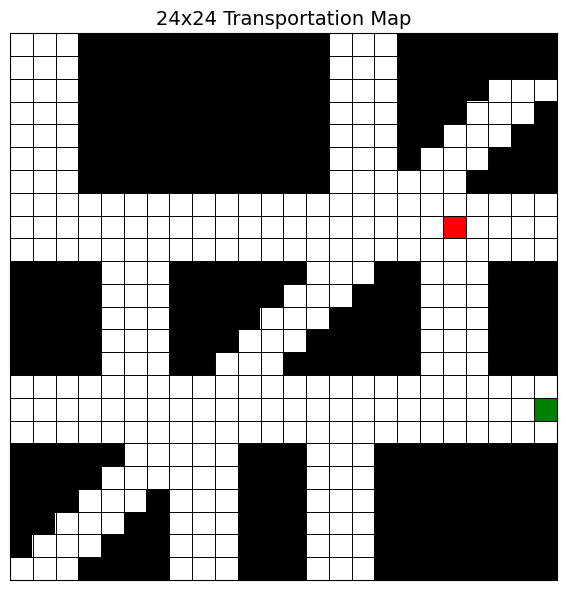

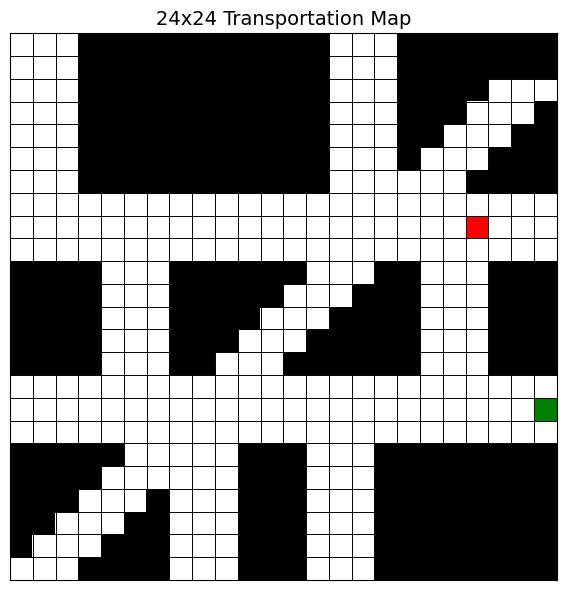

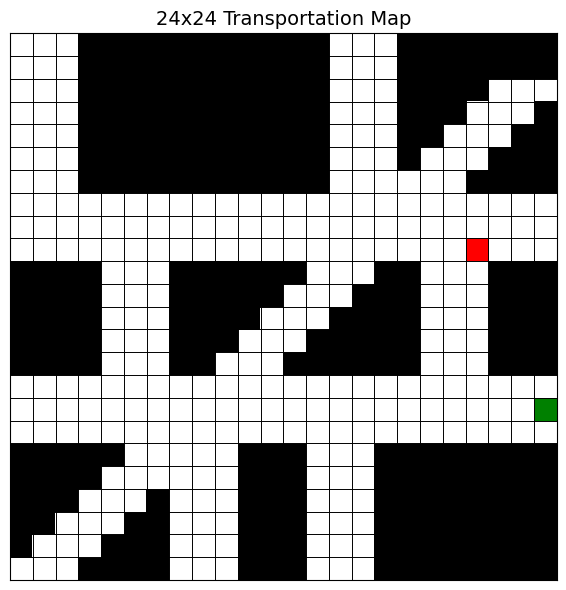

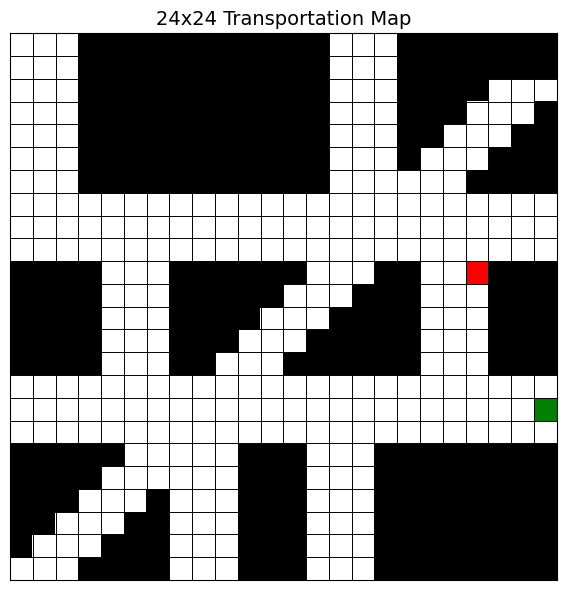

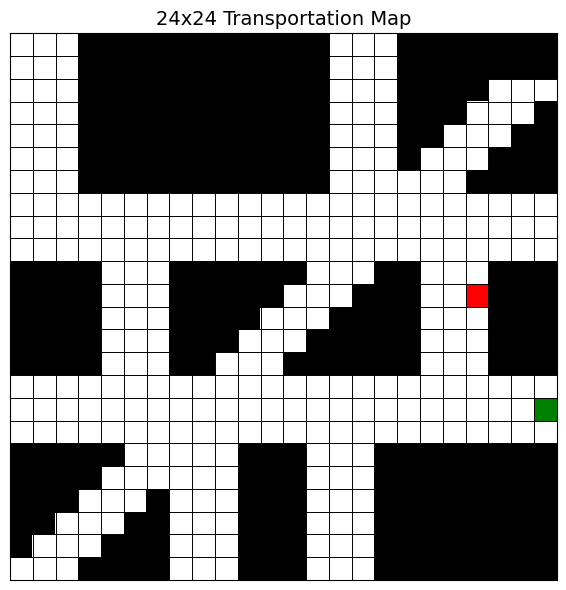

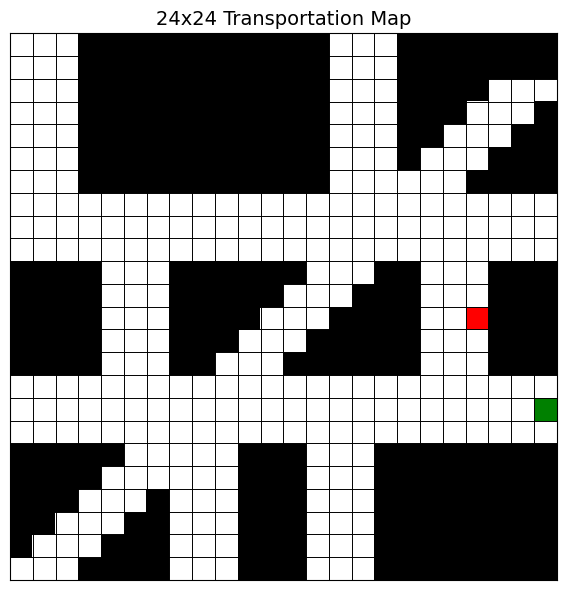

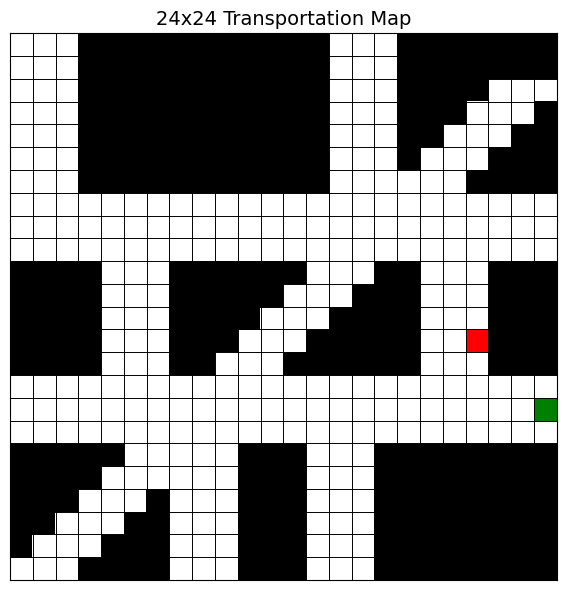

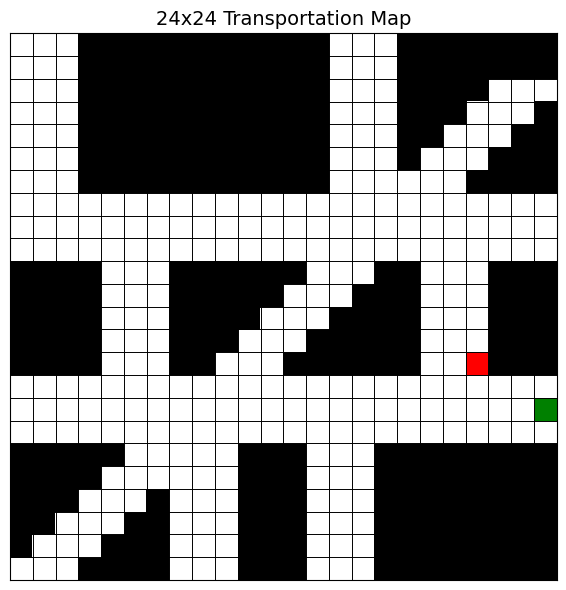

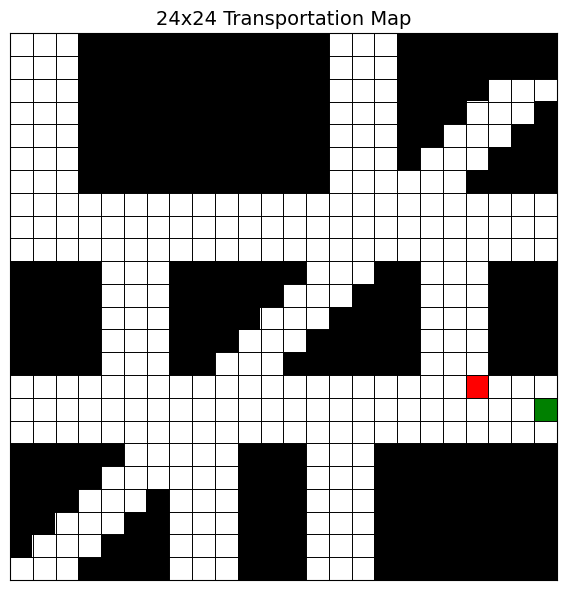

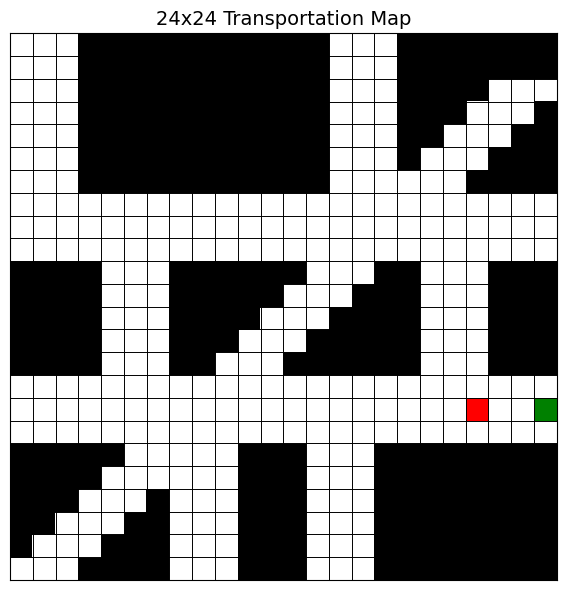

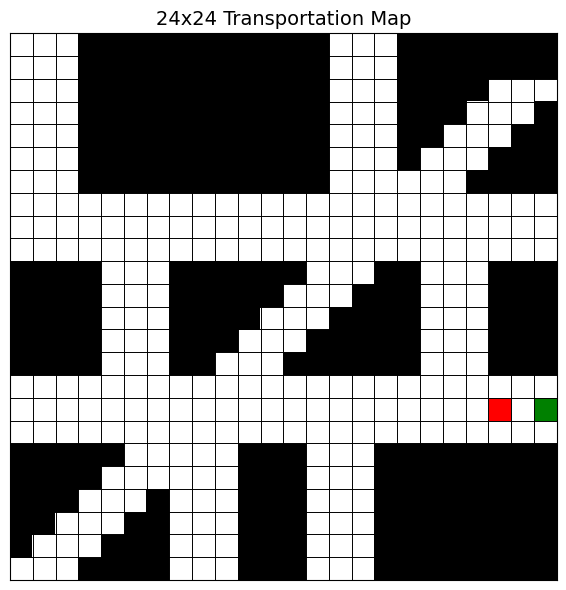

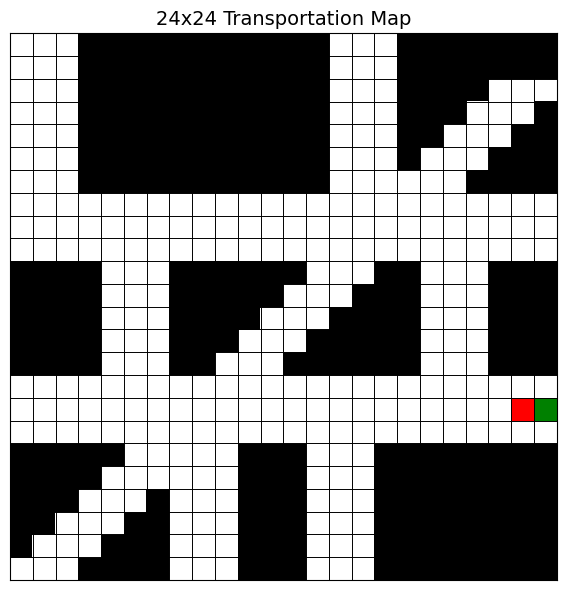

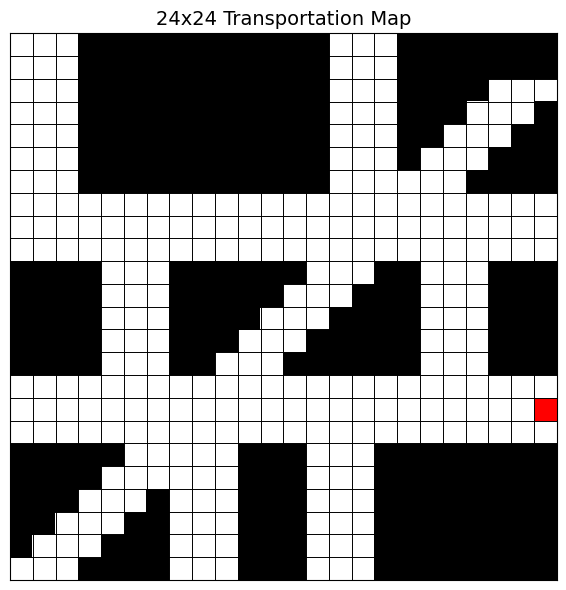

<<< Win >>>
===== Inference Done =====
ep_replay info: (31, 3, 24, 24) <class 'numpy.ndarray'>


Proceed?(Enter "go" to proceed, "done" to stop.):  done


Inference terminated...


In [3]:
from lib.env_manager_final import PathFindEnv
from lib.dqn_utils_final import DQN
from IPython.display import clear_output
import os

env = PathFindEnv(height=24, width=24)
dqn = DQN(train=False, input_size=24)

checkpoints = ["checkpoint8_30_01_90_6326_7329_2025-09-13.pth",
              "checkpoint8_30_03_90_6350_7420_2025-09-14.pth",
              "checkpoint8_30_06_90_6339_7357_2025-09-15.pth",
              "checkpoint8_30_07_90_6311_7151_2025-09-15.pth"]
env_info_files = ["env8_30_01_2025-09-13.obj",
                 "env8_30_03_2025-09-14.obj",
                 "env8_30_06_2025-09-15.obj",
                 "env8_30_07_2025-09-15.obj"]

ep_replay = None # 에피소드 진행 과정에서의 모든 스텝 기록
stop = False
for idx, pathes in enumerate(zip(checkpoints, env_info_files)):
    clear_output(wait=True)

    print(f"Current: {pathes[0]}, {pathes[1]}")

    # env_info: (tp_map, src_pos, dest_pos)
    env_info = env.restore(pathes[1]) # 환경 복원
    ep_replay = dqn.inference(env=env, init_state=env_info[0], checkpoint=pathes[0], verbose=True, path=os.path.join(os.getcwd(), "records", f"plot{idx+1}"))
    print("ep_replay info:", ep_replay.shape, type(ep_replay))

    while True:
        keyward = input("Proceed?(Enter \"go\" to proceed, \"done\" to stop.): ")
        match keyward:
            case "go":
                break
            case "done":
                stop = True
                print("Inference terminated...")
                break
            case _:
                print("Wrong keyward input. Please rewrite right keyward...")
                continue

    # 추론을 정지하는 경우
    if stop:
        break

In [ ]:
from lib.inference_utils_final import load_env, call_inference

# load_env():환경 불러오기 --> env_info, checkpoint_path, env
# env_info: (tp_map, src_pos, dest_pos)
## tp_map: 복원된 환경의 초기 상태
## src_pos: 출발지 위치 좌표(에이전트 초기 위치 좌표)
## dest_pos: 목적지 위치 좌표
# checkpoint_path: 복원한 환경에 대응하는 체크포인트 주소
# env: 복원된 환경
env_info, checkpoint_path, env = load_env()
# call_inference(env, init_state, checkpoint_paht, verbose=False):추론 수행 --> ep_replay
## env: 복원된 환경
## init_state: 환경의 초기 상태
## checkpoint_path: 복원한 환경에 대응하는 체크포인트 주소
## verbose: ep_replay 시각화 여부(기본은 비활성화)
# ep_replay: M x 3 x 24 x 24 형태의 ndarray
ep_replay = call_inference(env, env_info[0], checkpoint_path)
print("ep_replay info:", ep_replay.shape, type(ep_replay))

===== Inference Done =====
ep_replay info: (23, 3, 24, 24) <class 'numpy.ndarray'>
